Configuration de train_model() et predict_image() dans ce notebook

* Il faut prendre quoi comme valeur d'epsilon par defaut ?
**la meilleure combinaison de valeurs est en sortie de la fonction gridsearch_analysis (valeur par défaut changeant en fonction du set d'image)**

* train_model() prend maintenant en input: X, y, label_encoder + config.all_variables
* predict_image() prend maintenant en input un np.array

* Je ne trouve pas un model > 90% d'accuracy
**on l'a testé sur LFW; l'accuracy peut changer avec une image inconnue (d'où l'indication des améliorations futures "changer la méthode de bruit ou changer de modèle")**

* Dans la DB, les images ont 1 ou 3 channels ? (greyscale/RGB)
**originales : 3
processed/anonymisées : 1**

* J'ai ajouté une fonction resize_images à implementer dans train_model() car:
    * Taille des images variables pour chaque user
**ATTENTION : LE MODELE S'ENTRAINE SUR TOUTE LA DB. SI PLUSIEURS TAILLE D'IMAGE (DE MATRICE) SONT RENCONTRES, L'ENTRAINEMENT S'ARRETERA**
**il faut conserver les mêmes dimensions entre l'entrainement et la prédiction qu'entre chaque images**

* Verifier le ML car:
    * Nombre d'images variable en fonction des users
**AJOUT D'UN BALANCED ACCURACY UTILE MAIS OVERKILL : ON PEUT S'EN PASSER**

* Je n'ai pas utilisé les variables de **config** pour faire des fonctions plus propre. Elle pourront être récupéré plus tard juste avant l'appel des fonctions
* Ajout de show_logs car le GUI n'a pas besoin de print

In [6]:
import controller.ml_controller as mlc

In [7]:
#####--- Import data ---#####
DB_PATH = r"..\data\gui_database.db"

#####--- prepare_data_train_model ---#####
WIDTH, HEIGHT = (100, 100)
SPLIT_STRATEGY = 'stratified'
TEST_SPLIT_RATIO = 0.2
VALIDATION_SPLIT_RATIO = 0.15
RANDOM_STATE = 42
N_TRAIN_PER_SUBJECT = 7

#####--- create_model ---#####
#WIDTH, HEIGHT = WIDTH, HEIGHT
MODEL_SAVE_DIR = r'..\data\ml_models\trained'
LOG_DIR = r'..\data\ml_models\logs'
MODEL_NAME = 'simple_cnn_lfw_anony_v1'
MODEL_ARCHITECTURE = 'simple_cnn'
LEARNING_RATE = 0.001
EARLY_STOPPING_PATIENCE = 10
TRANSFER_BASE_MODEL_NAME = 'MobileNetV2'
TRANSFER_FREEZE_BASE = True

#####--- train_model ---#####
#MODEL_SAVE_DIR = MODEL_SAVE_DIR
#MODEL_NAME = MODEL_NAME
BATCH_SIZE = 32
EPOCHS = 50

### Get data from LFW dataset folder

In [3]:
import os
import controller.ml_controller as ml

LFW_DATASET_PATH = r"..\data\reconstructed_pipeline"
os.makedirs(LFW_DATASET_PATH, exist_ok=True)

X, y, label_encoder = ml.data_loader.load_anonymized_images_flat(
    data_dir=LFW_DATASET_PATH,
    img_width=WIDTH,
    img_height=HEIGHT,
    color_mode='grayscale'
)

Chargement des images depuis : ..\data\reconstructed_pipeline
Format attendu : 100x100, mode: grayscale
Erreur: Aucun fichier .png trouvé dans ..\data\reconstructed_pipeline


### Get data from database

In [8]:
X, y, label_encoder = mlc.MLController.get_data_from_db(DB_PATH)
print(f"(nb_image, width, height, dim) : {X.shape}")

(nb_image, width, height, dim) : (467, 100, 100, 3)


### Prepare data

In [9]:
res = mlc.prepare_data_train_model2(
    X, y, label_encoder,
    input_shape=(WIDTH, HEIGHT),
    split_strategy=SPLIT_STRATEGY,
    test_split_ratio=TEST_SPLIT_RATIO,
    validation_split_ratio=VALIDATION_SPLIT_RATIO,
    random_state=RANDOM_STATE,
    n_train_per_subject=N_TRAIN_PER_SUBJECT
)
num_classes, X_train, y_train, X_test, y_test, X_val, y_val, validation_data = res
print(f"Image size : {X_train.shape[1:]}")

Division des données : test_size=0.2, validation_size=0.15
Taille Test: 94 échantillons
Taille Entraînement: 303 échantillons
Taille Validation: 70 échantillons
Image size : (100, 100, 1)


### Create Model

In [10]:
res = mlc.create_model2(
    num_classes,
    input_shape=(WIDTH, HEIGHT),
    model_save_dir=MODEL_SAVE_DIR,
    log_dir=LOG_DIR,
    model_name=MODEL_NAME,
    model_architecture=MODEL_ARCHITECTURE,
    learning_rate=LEARNING_RATE,
    early_stopping_patience=EARLY_STOPPING_PATIENCE,
    transfer_base_model_name=TRANSFER_BASE_MODEL_NAME,
    transfer_freeze_base=TRANSFER_FREEZE_BASE
)
model, callbacks, model_filepath, summary_text = res

Construction du modèle CNN simple avec input_shape=(100, 100, 1) et num_classes=43
Modèle CNN simple construit.


### Train model

--- Démarrage du Script d'Entraînement ---

Epoch 1: val_accuracy improved from -inf to 0.02857, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 2: val_accuracy did not improve from 0.02857

Epoch 3: val_accuracy improved from 0.02857 to 0.10000, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 4: val_accuracy improved from 0.10000 to 0.15714, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 5: val_accuracy improved from 0.15714 to 0.18571, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 6: val_accuracy did not improve from 0.18571

Epoch 7: val_accuracy did not improve from 0.18571

Epoch 8: val_accuracy improved from 0.18571 to 0.22857, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 9: val_accuracy did not improve from 0.22857

Epoch 10: val_accuracy did not improve from 0.22857

Epoch 11: val_accuracy improved from 0.22857 to 0.27143, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 12: val_accuracy improved from 0.27143 to 0.28571, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 13: val_accuracy did not improve from 0.28571

Epoch 14: val_accuracy improved from 0.28571 to 0.31429, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 15: val_accuracy did not improve from 0.31429

Epoch 16: val_accuracy improved from 0.31429 to 0.32857, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 17: val_accuracy did not improve from 0.32857

Epoch 18: val_accuracy improved from 0.32857 to 0.35714, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 19: val_accuracy did not improve from 0.35714

Epoch 20: val_accuracy did not improve from 0.35714

Epoch 21: val_accuracy improved from 0.35714 to 0.37143, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 22: val_accuracy did not improve from 0.37143

Epoch 23: val_accuracy improved from 0.37143 to 0.40000, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 24: val_accuracy did not improve from 0.40000

Epoch 25: val_accuracy did not improve from 0.40000

Epoch 26: val_accuracy did not improve from 0.40000

Epoch 27: val_accuracy improved from 0.40000 to 0.41429, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 28: val_accuracy improved from 0.41429 to 0.42857, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 29: val_accuracy improved from 0.42857 to 0.45714, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 30: val_accuracy did not improve from 0.45714

Epoch 31: val_accuracy did not improve from 0.45714

Epoch 32: val_accuracy did not improve from 0.45714

Epoch 33: val_accuracy improved from 0.45714 to 0.47143, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 34: val_accuracy did not improve from 0.47143

Epoch 35: val_accuracy did not improve from 0.47143

Epoch 36: val_accuracy improved from 0.47143 to 0.48571, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 37: val_accuracy did not improve from 0.48571

Epoch 38: val_accuracy did not improve from 0.48571

Epoch 39: val_accuracy did not improve from 0.48571

Epoch 40: val_accuracy did not improve from 0.48571

Epoch 41: val_accuracy improved from 0.48571 to 0.50000, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 42: val_accuracy did not improve from 0.50000

Epoch 43: val_accuracy did not improve from 0.50000

Epoch 44: val_accuracy did not improve from 0.50000

Epoch 45: val_accuracy did not improve from 0.50000

Epoch 46: val_accuracy did not improve from 0.50000

Epoch 47: val_accuracy did not improve from 0.50000

Epoch 48: val_accuracy improved from 0.50000 to 0.51429, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 49: val_accuracy did not improve from 0.51429

Epoch 50: val_accuracy did not improve from 0.51429
Restoring model weights from the end of the best epoch: 48.
LabelEncoder sauvegardé dans : ..\data\models\trained\simple_cnn_lfw_anony_v1_label_encoder.joblib
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4397 - loss: 2.1714
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w


curves : <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1200x500 at 0x2030EA2D4F0>

confusion_matrix : [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]

classification_report : {'0': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2.0}, '1': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2.0}, '2': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2.0}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, '4': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 2.0}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3.0}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, '9': {'precision': 1.0, 'recall': 1.0, 'f

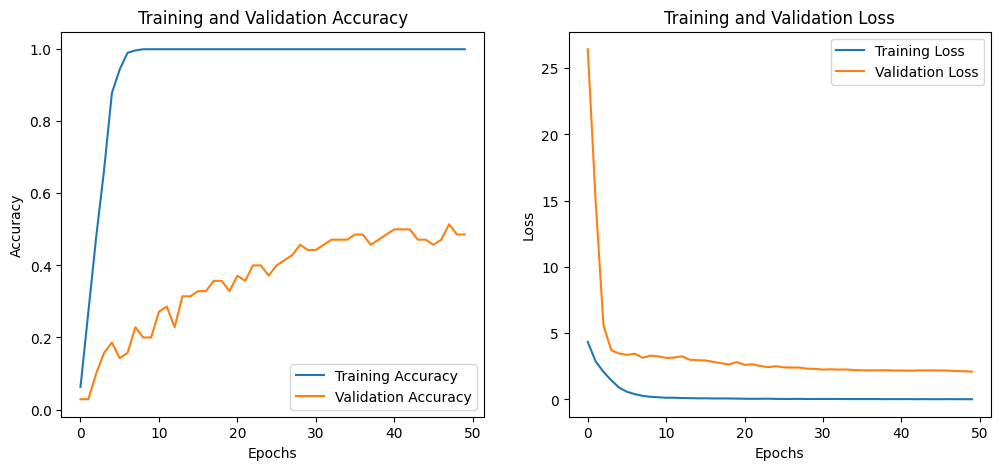

In [11]:
# Start timer
import time
print("--- Démarrage du Script d'Entraînement ---")
start_time = time.time()

# Train Model
res = mlc.train_model2(
    model,
    X_train, y_train, X_test, y_test,
    validation_data, callbacks, label_encoder, model_filepath,
    model_save_dir=MODEL_SAVE_DIR,
    model_name=MODEL_NAME,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,

)
for key, val in res.items(): print(f"\n{key} : {val}")

# End timer
end_time = time.time()
duration = end_time - start_time
print(f"--- Script d'Entraînement Terminé en {duration:.2f} secondes ---")

# Predict

In [12]:
X, y, label_encoder = mlc.MLController.get_data_from_db(DB_PATH)
print(f"(nb_image, width, height, dim) : {X.shape}")

(nb_image, width, height, dim) : (467, 100, 100, 3)


In [50]:
import numpy as np
from PIL import Image

def reshape_image(image, input_shape: (int, int)):
    img_resized = np.array(Image.fromarray(image).resize(input_shape))
    if img_resized.ndim == 3:
        img_gray = np.dot(img_resized[..., :3], [0.2989, 0.5870, 0.1140])[..., np.newaxis]
    elif img_resized.ndim == 2:
        img_gray = img_resized[..., np.newaxis]
    else:
        img_gray = img_resized
    return img_gray

In [29]:
# Image to predict
index = 30

img_to_predict = reshape_image(X[index], (WIDTH, HEIGHT))
true_result = y[index]
img_to_predict.shape

(100, 100, 1)

In [17]:
# Image to predict
index = 30

img_to_predict = X[index]
true_result = y[index]

# Make a prediction
prediction = mlc.predict_image(img_to_predict, model_save_dir=MODEL_SAVE_DIR)

# Result
print(f"prediction: {prediction}")
print(f"true_result: {true_result}")
print(f"The model is correct: {prediction==true_result}")

LabelEncoder chargé depuis : ..\data\models\trained\simple_cnn_lfw_anony_v1_label_encoder.joblib


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "conv1_1" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 100, 100, 3)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(1, 100, 100, 3), dtype=float32)
  • training=False
  • mask=None

In [31]:
from tensorflow.keras.models import load_model
import src.modules.data_loader as data_loader
import numpy as np
from PIL import Image

image_array= img_to_predict
model_save_dir: str = 'models/trained/'
model_name: str = 'simple_cnn_lfw_anony_v1'
input_shape: tuple = (100, 100, 1)
show_logs = False

In [41]:
img_to_predict = X[index]
true_result = y[index]

img_to_predict.shape

width, height, _ = input_shape
image_array = Image.fromarray(image_array)


TypeError: Cannot handle this data type: (1, 1, 100, 3), <f4

In [48]:
prediction_probabilities = model.predict(image_array)


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "conv1_1" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 100, 100, 3)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(1, 100, 100, 3), dtype=float32)
  • training=False
  • mask=None

In [54]:
img_to_predict.shape

(100, 100, 3)

In [59]:
image_array = img_to_predict

if show_logs: print("--- Démarrage du Script de Prédiction ---")
start_time = time.time()

# --- 1. Charger Configuration et Chemins ---
model_filepath = os.path.join(model_save_dir, f"{model_name}.h5")
encoder_filepath = os.path.join(model_save_dir, f"{model_name}_label_encoder.joblib")

if show_logs:
    print(f"  - Modèle utilisé: {model_filepath}")
    print(f"  - Encodeur utilisé: {encoder_filepath}")
    print(f"  - Image à prédire: tableau NumPy, shape={image_array.shape}")

# --- 2. Charger Modèle et Encodeur ---
if not os.path.exists(model_filepath):
    raise FileNotFoundError(f"Modèle introuvable: {model_filepath}")
model = load_model(model_filepath)

label_encoder = data_loader.load_label_encoder(encoder_filepath)
if label_encoder is None:
    raise ValueError("Erreur: Encodeur de labels introuvable ou invalide")

# --- 3. Prétraitement de l’image ---
width, height, _ = input_shape
#image_array = np.array(Image.fromarray(image_array).resize((width, height)))
print('$$$')
image_array = reshape_image(image_array, (width, height))

image_array = image_array.astype("float32") / 255.0

print('***')
print(image_array.shape)
# --- 4. Prédiction ---
prediction_probabilities = model.predict(image_array)
predicted_index = np.argmax(prediction_probabilities[0])
prediction_confidence = prediction_probabilities[0][predicted_index]
predicted_label = label_encoder.inverse_transform([predicted_index])[0]
print('---')

if show_logs:
    print("\n--- Résultat de la Prédiction ---")
    print(f"  - Identité Prédite : {predicted_label}")
    print(f"  - Confiance : {prediction_confidence:.4f} ({prediction_confidence*100:.2f}%)")

    print(f"--- Script terminé en {time.time() - start_time:.2f} secondes ---")


LabelEncoder chargé depuis : models/trained/simple_cnn_lfw_anony_v1_label_encoder.joblib
$$$
***
(100, 100, 1)


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node simple_cnn_1/pool1_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](simple_cnn_1/bn1_2_1/batchnorm/add_1)' with input shapes: [32,100,1,32].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(32, 100, 1, 32), dtype=float32)